# Lead Scoring Assignment

### Problem Statement

    An education company named X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
    
    Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
    
    There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.
    
    The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Objective

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
 

## Step 1: Reading and Understanding the data

In [1]:
#To supress the warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the libraries needed

import numpy as np
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt

In [3]:
#Read the csv file containing the data
Lead_Score=pd.read_csv('Leads.csv')
Lead_Score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspect the various aspects of the dataframe

In [4]:
Lead_Score.shape

(9240, 37)

In [5]:
Lead_Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
Lead_Score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Checking for duplicates and dropping the entire duplicate row if any
Lead_Score.drop_duplicates(subset=None,inplace=True)

In [8]:
Lead_Score.shape

(9240, 37)

There are no duplicate values.

In [9]:
#Get the column name from the dataset
column=Lead_Score.columns
column

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
# Find the count for each value in attributes
for col in column:
    print(Lead_Score[col].value_counts())

af64b984-5e5d-4f0d-b853-4b35ee8e16ae    1
2961d8b9-3c2e-46a0-be05-8602c79d6335    1
e15342a3-ca98-4401-8a76-a7ff920546c7    1
569a6c93-6e8a-4d6b-a419-5775c867d5ac    1
dfa8a8ca-b2c5-4c64-9e62-9d47ecbe1e41    1
                                       ..
b5629aad-7290-4082-b31c-8affff6fbfcb    1
f6248b17-c94e-4c5d-bcc6-04f8bfead0cd    1
a1fa2333-15d6-47cb-8056-98de1f5cc1ad    1
a525e0db-e1a3-4a62-b606-a973dcf33dd7    1
75f84d56-5334-4c53-9cd0-9c7231eb8707    1
Name: Prospect ID, Length: 9240, dtype: int64
608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

There are no unknown/garbage values in the data

In [11]:
Lead_Score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
#Converting 'Select' values to NaN.
Lead_Score.replace("Select",np.nan,inplace=True)

In [13]:
Lead_Score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [14]:
#Find the number of null values in each column
Lead_Score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
#Find the percentage of null values in each column
round((Lead_Score.isnull().sum()/len(Lead_Score.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [16]:
# Dropping the columns with the missing values greater than 50
for col in column:
    if(round((Lead_Score[col].isnull().sum()/len(Lead_Score.index))*100,2)>50):
        Lead_Score.drop(col,axis=1,inplace=True)

In [17]:
Lead_Score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [18]:
# Display the count for each value of the columns
column=Lead_Score.columns
for col in column:
    print(Lead_Score[col].value_counts())

af64b984-5e5d-4f0d-b853-4b35ee8e16ae    1
2961d8b9-3c2e-46a0-be05-8602c79d6335    1
e15342a3-ca98-4401-8a76-a7ff920546c7    1
569a6c93-6e8a-4d6b-a419-5775c867d5ac    1
dfa8a8ca-b2c5-4c64-9e62-9d47ecbe1e41    1
                                       ..
b5629aad-7290-4082-b31c-8affff6fbfcb    1
f6248b17-c94e-4c5d-bcc6-04f8bfead0cd    1
a1fa2333-15d6-47cb-8056-98de1f5cc1ad    1
a525e0db-e1a3-4a62-b606-a973dcf33dd7    1
75f84d56-5334-4c53-9cd0-9c7231eb8707    1
Name: Prospect ID, Length: 9240, dtype: int64
608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

## Step2 : Visualisation of the Data

### Visualising the numerical data

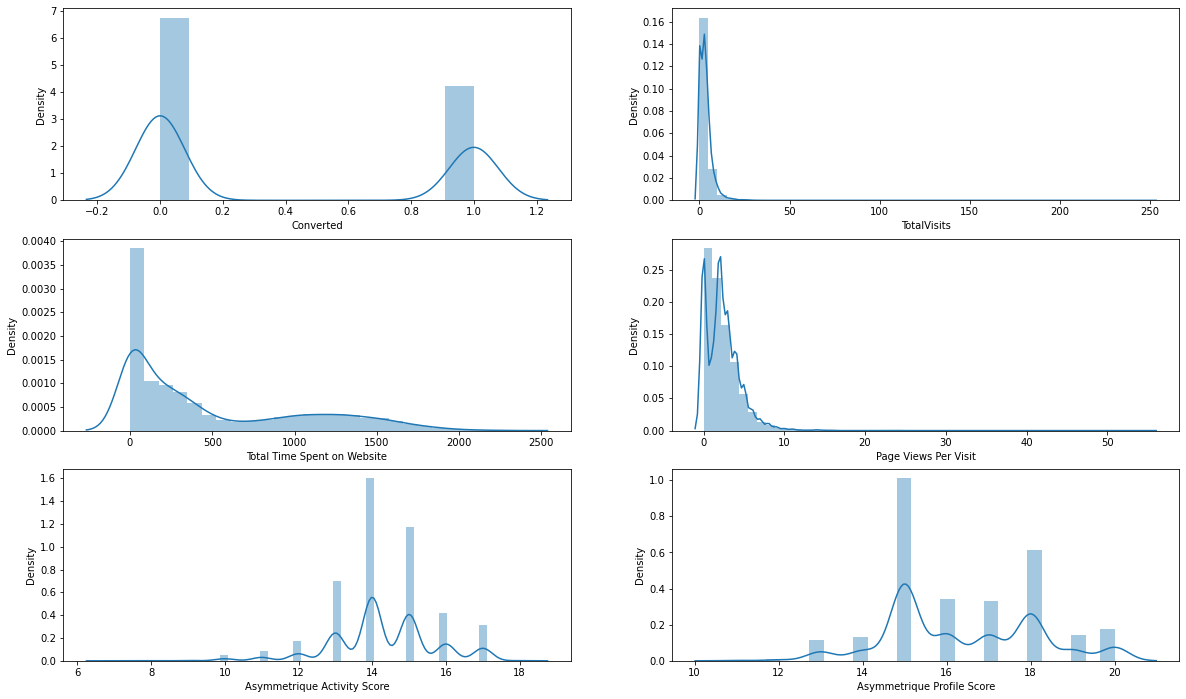

In [19]:
#Plot the dist plot for  the numerical variables
plt.figure(figsize=(20, 12))

plt.subplot(3,2,1)
sns.distplot(Lead_Score['Converted'])
plt.subplot(3,2,2)
sns.distplot(Lead_Score['TotalVisits'])
plt.subplot(3,2,3)
sns.distplot(Lead_Score['Total Time Spent on Website'])
plt.subplot(3,2,4)
sns.distplot(Lead_Score['Page Views Per Visit'])
plt.subplot(3,2,5)
sns.distplot(Lead_Score['Asymmetrique Activity Score'])
plt.subplot(3,2,6)
sns.distplot(Lead_Score['Asymmetrique Profile Score'])

plt.show()

 Inferences:
  - From the above plots we can conclude that the converted value is high for 0 than 1.It means most of the leads remains       not converted to business.
  - The Total Time Spent on Website is right skewed and is less than 500.It has a peak between 1000 and 1500.
  - The Asymmetrique Activity Score is left skewed and the value is highest for 14 and then followed by 15.
  - The Total visits is right skewed and the peak  is between 0-20 .
  - The Page Views per Visit is between 0 and 10.The values peaks at 0 and slowly decreases later on .It is right skewed
  - The Asymmetrique Profile is left skewed and the value is highest for 15 nd then followed by 18.

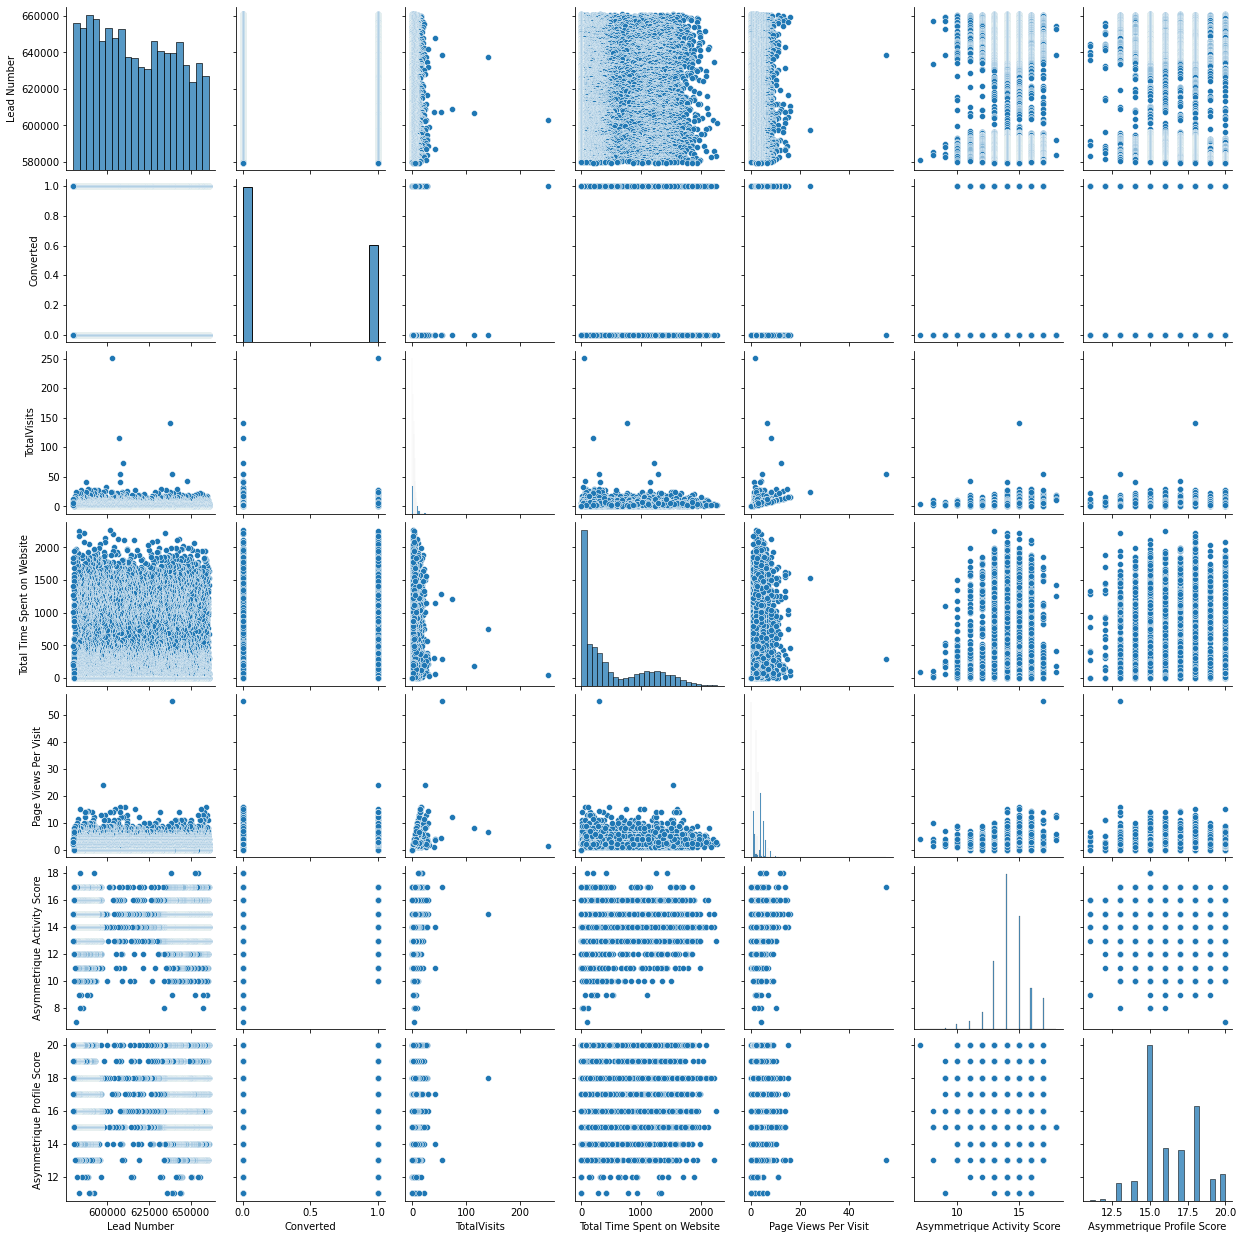

In [20]:
#Pairplot for all the numeric variables
sns.pairplot(Lead_Score)
plt.show()

Inferences:

We can infer the following from the above pair plot
    
    - When the Total Visits is high the chance of customer getting converted to potential Lead is very high
    - The Total visits wrt to Total time Spent on website is randomly distributed with few outliers .Not much can be inferred from the same.
    - The Total visits wrt the Page views per visit is somewhat linearly distributed with few outliers
    

In [21]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(Lead_Score['Converted'])/len(Lead_Score['Converted'].index))*100
Converted

38.53896103896104

The % of data converted to 1 is 38%

In [22]:
#Checking correlations of numeric values
Correlation=Lead_Score.corr()
Correlation

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
Lead Number,1.000000,0.025157,0.022223,0.020329,0.058808,-0.067982,-0.129124
Converted,0.025157,1.000000,0.030395,0.362483,-0.003328,0.167962,0.218571
TotalVisits,0.022223,0.030395,1.000000,0.221240,0.512125,-0.058514,0.130887
Total Time Spent on Website,0.020329,0.362483,0.221240,1.000000,0.320361,-0.065287,0.175589
Page Views Per Visit,0.058808,-0.003328,0.512125,0.320361,1.000000,-0.162892,0.161254
Asymmetrique Activity Score,-0.067982,0.167962,-0.058514,-0.065287,-0.162892,1.000000,-0.123250
Asymmetrique Profile Score,-0.129124,0.218571,0.130887,0.175589,0.161254,-0.123250,1.000000


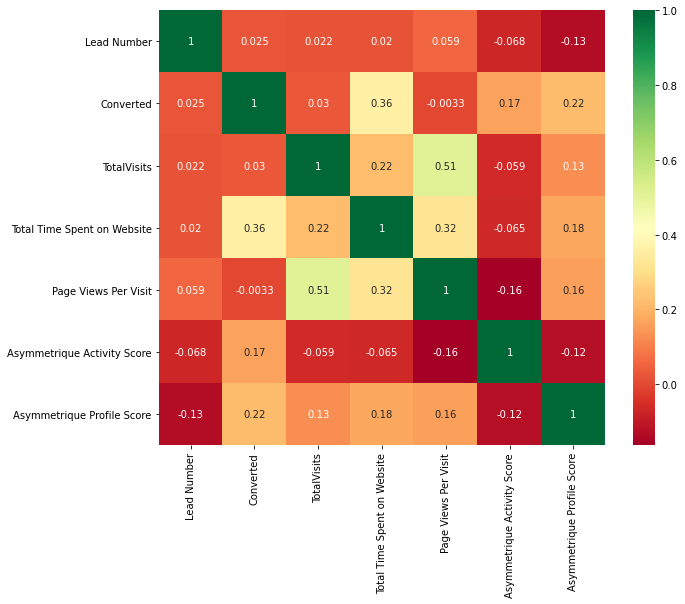

In [23]:
#Plot the heatmap
plt.figure(figsize=[10,8])
sns.heatmap(Correlation,cmap="RdYlGn",annot=True)
plt.show()

From the plot nothing much could be inferred.There are no two columns that have high correlation between them.

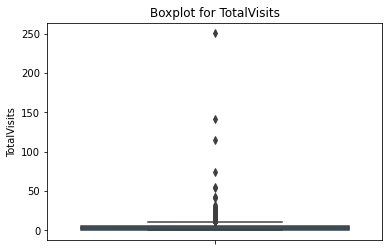

In [24]:
#visualizing the box plot for TotalVisits variable

plt.figure(figsize=(6,4))
sns.boxplot(y=Lead_Score['TotalVisits'])
plt.title("Boxplot for TotalVisits")
plt.show()

In [25]:
Lead_Score["TotalVisits"].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

We can see that the boxplot for TotalVisits have outliers .Hence we will use capping and cap the lower limit at 0.01 and upper limit at 0.99

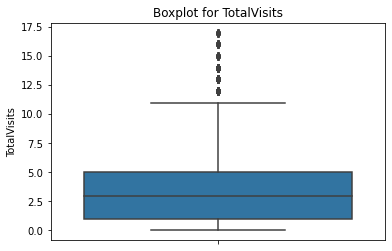

In [26]:
#Outlier removal
Q1=Lead_Score['TotalVisits'].quantile(0.01)
Lead_Score=Lead_Score[(Lead_Score['TotalVisits']>=Q1)]
Q3=Lead_Score['TotalVisits'].quantile(0.99)
Lead_Score=Lead_Score[(Lead_Score['TotalVisits']<=Q3)]
plt.figure(figsize=(6,4))
sns.boxplot(y=Lead_Score['TotalVisits'])
plt.title("Boxplot for TotalVisits")
plt.show()

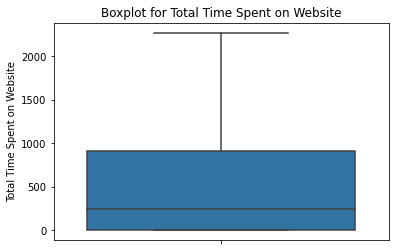

In [27]:
#visualizing the box plot for Total Time Spent on Website variable

plt.figure(figsize=(6,4))
sns.boxplot(y=Lead_Score['Total Time Spent on Website'])
plt.title("Boxplot for Total Time Spent on Website")
plt.show()

There is no outlier for the column 'Total Time Spent on Website'>hence we will leave it as it is

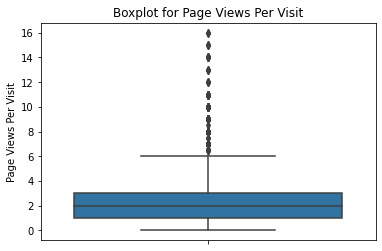

In [28]:
#visualizing the box plot for Page Views Per Visit variable

plt.figure(figsize=(6,4))
sns.boxplot(y=Lead_Score['Page Views Per Visit'])
plt.title("Boxplot for Page Views Per Visit")
plt.show()

In [29]:
Lead_Score["Page Views Per Visit"].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

We can see there are outliers .It is possible that the page views per visit be 16(maximum value) .Hence we ignore those outliers

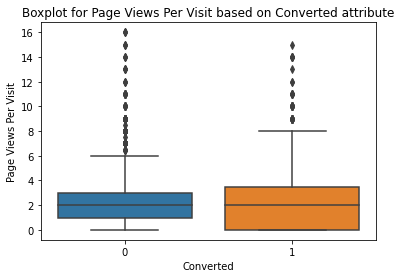

In [30]:
#visualizing the box plot for Page Views Per Visit variable

plt.figure(figsize=(6,4))
sns.boxplot(y=Lead_Score['Page Views Per Visit'],x=Lead_Score["Converted"])
plt.title("Boxplot for Page Views Per Visit based on Converted attribute")
plt.show()

Nothing much can be inferred from the above chart of  Page Views Per Visit.The median is same for converted and not converted

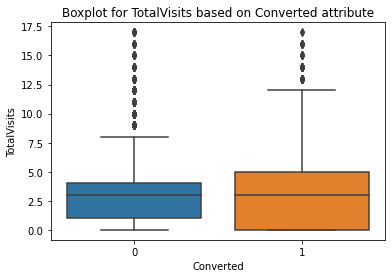

In [31]:
#visualizing the box plot for TotalVisits variable

plt.figure(figsize=(6,4))
sns.boxplot(y=Lead_Score['TotalVisits'],x=Lead_Score["Converted"])
plt.title("Boxplot for TotalVisits based on Converted attribute")
plt.show()

From the above chart it is clearly evident that when TotalVisits count is high from the 75% for getting converted.But the medain is same for both

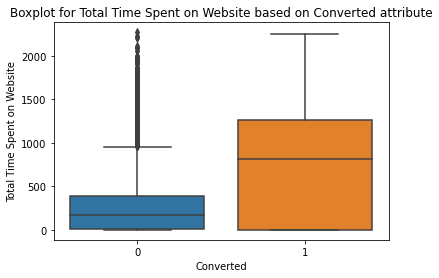

In [32]:
#visualizing the box plot for Total Time Spent on Website variable

plt.figure(figsize=(6,4))
sns.boxplot(y=Lead_Score['Total Time Spent on Website'],x=Lead_Score["Converted"])
plt.title("Boxplot for Total Time Spent on Website based on Converted attribute")
plt.show()

The Total Time Spent on Website is high for the data converted when compared to Not converted.So customers tends to spend more time on website before accepting the course

### Visualising the Categorical data

In [33]:
#code snippet for plotting the countplot of categorical data
def chart(col_name):
    fig, ax1 =plt.subplots(figsize=(8,6))
    graph=sns.countplot(ax=ax1,x=col_name, data=Lead_Score)
    i=0
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        Lead_Score[col_name].value_counts()[i],ha="center")
        i += 1

    plt.title("Plotting the count for each value in the {} column".format(col_name))
    plt.xticks(rotation=90)
    plt.show()
    
def bivariatechart(col_name):
    fig, ax =plt.subplots(figsize=(10,8))
    graph=sns.countplot(x=col_name, data=Lead_Score,hue=Lead_Score.Converted)
    plt.title("Plotting the count for each value in the {} column".format(col_name))
    plt.xticks(rotation=90)
    plt.show()

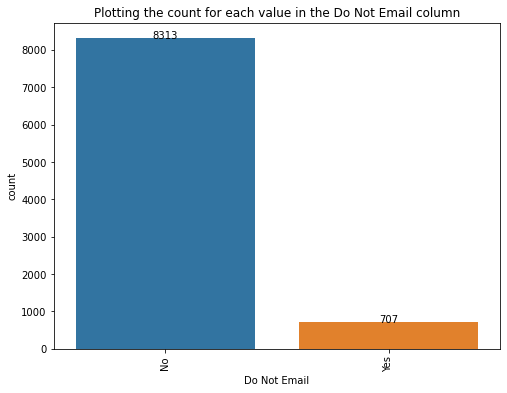

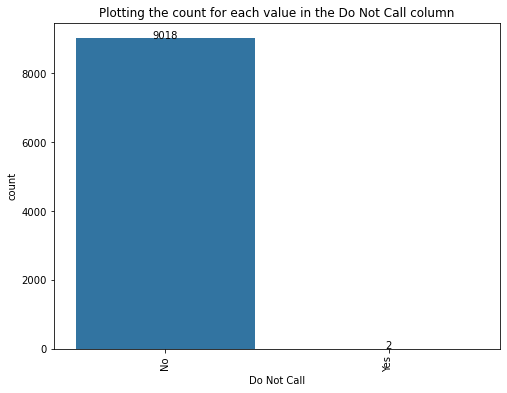

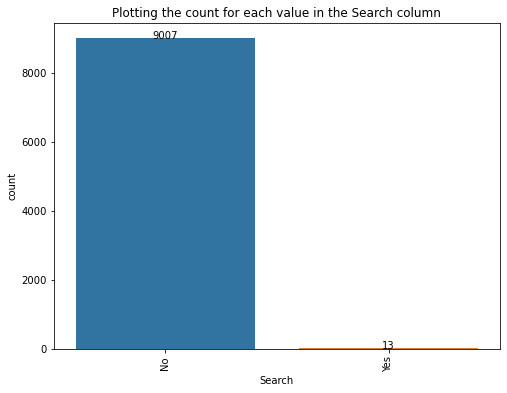

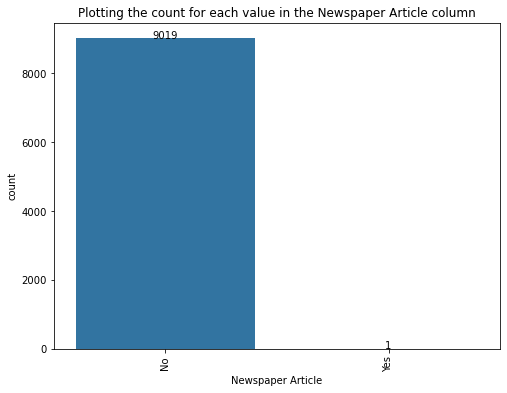

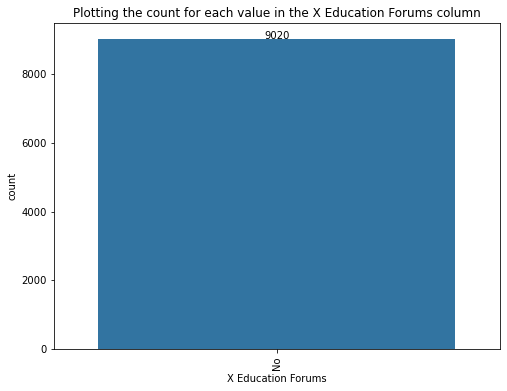

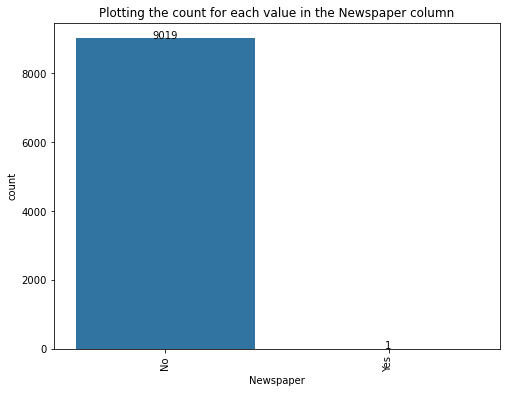

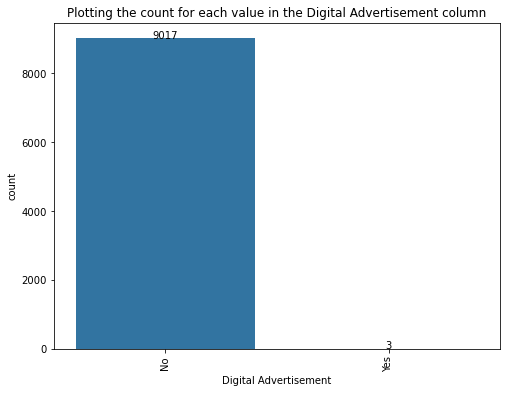

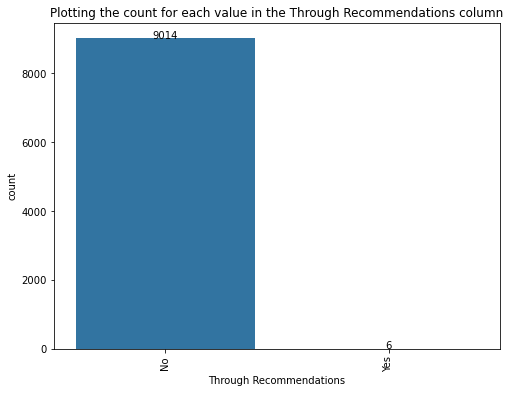

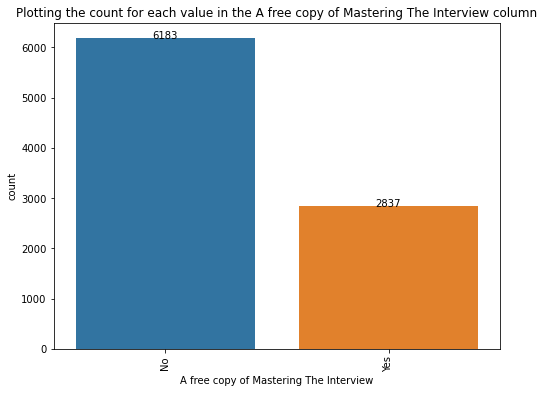

In [34]:
#Plotting the countplot for the columns 'Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'
cols=['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'
       ]
for i in cols:
    chart(i)



Inferences:
- From the above plot we can see that Mostly of the clients prefer to receive Emails,Calls
- From the above plot it can be concluded that  whether the customer had seen the ad in any of the listed items:'Search', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations' are very low.
- Around 31% of the clients prefer to receive the copy of 'A free copy of Mastering The Interview'

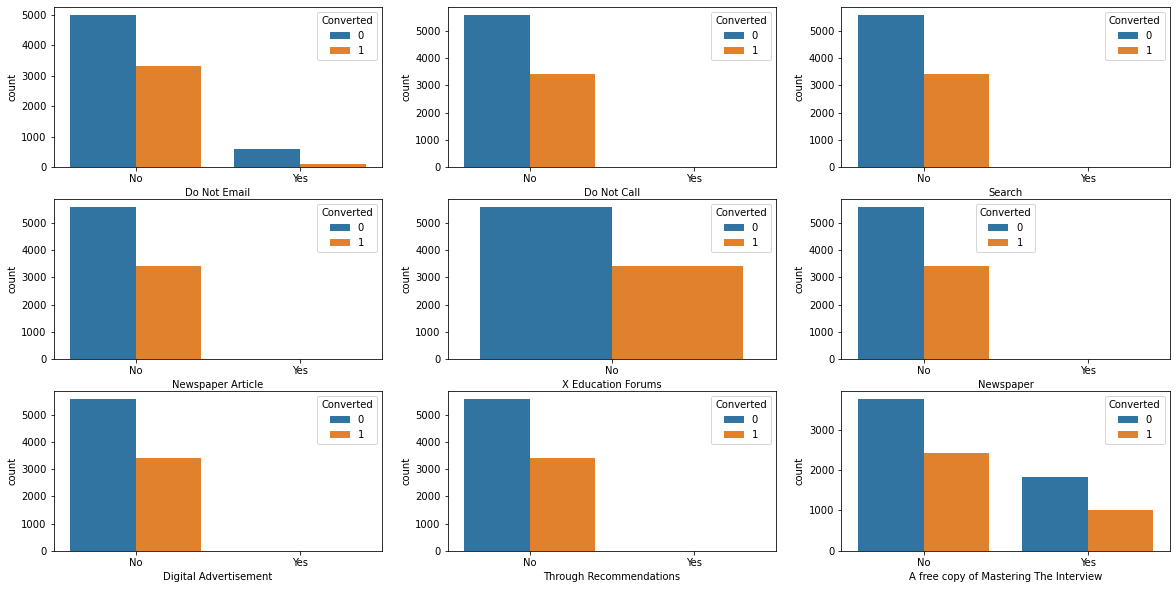

In [35]:
#Plotting the countplot for the columns 'Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'
#wrt to Converted column

plt.figure(figsize=[20,10])

plt.subplot(3,3,1)
sns.countplot(x='Do Not Email', data=Lead_Score,hue=Lead_Score.Converted)
plt.subplot(3,3,2)
sns.countplot(x='Do Not Call', data=Lead_Score,hue=Lead_Score.Converted)
plt.subplot(3,3,3)
sns.countplot(x='Search', data=Lead_Score,hue=Lead_Score.Converted)
plt.subplot(3,3,4)
sns.countplot(x='Newspaper Article', data=Lead_Score,hue=Lead_Score.Converted)
plt.subplot(3,3,5)
sns.countplot(x='X Education Forums', data=Lead_Score,hue=Lead_Score.Converted)
plt.subplot(3,3,6)
sns.countplot(x='Newspaper', data=Lead_Score,hue=Lead_Score.Converted)
plt.subplot(3,3,7)
sns.countplot(x='Digital Advertisement', data=Lead_Score,hue=Lead_Score.Converted)
plt.subplot(3,3,8)
sns.countplot(x='Through Recommendations', data=Lead_Score,hue=Lead_Score.Converted)
plt.subplot(3,3,9)
sns.countplot(x='A free copy of Mastering The Interview', data=Lead_Score,hue=Lead_Score.Converted)

plt.show()

From the above subplot we can infer the following:
- The customer who have wished to not receive any emails tend to be not converted.
- Most of the customer prefer calls
- From the above plot it can be concluded that whether the customer had seen the ad in any of the listed items:'Search', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations' are very low.
- Not much can be inferred from the column 'A free copy of Mastering the Interview' as we can see from the graph that either they opt for it or not around half the percentage of each group tends to be converted.

In [36]:
# Count of values of Lead Origin
Lead_Score['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4820
API                        3562
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64

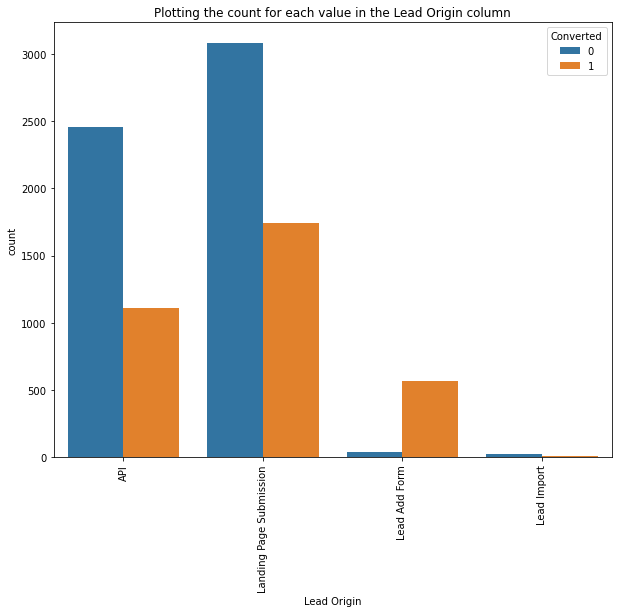

In [37]:
#Plot showing the distribution of the Lead Origin value along with the Converted attribute
bivariatechart('Lead Origin')

From the above plot it can be inferred the Landing Page Submission has the high conversion value followed by API and Lead Add Form

In [38]:
# Count of values for Lead Source
Lead_Score['Lead Source'].value_counts(dropna=False)

Google               2850
Direct Traffic       2512
Olark Chat           1751
Organic Search       1125
Reference             442
Welingak Website      129
Referral Sites        123
Facebook               31
NaN                    29
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
testone                 1
WeLearn                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [39]:
#Replace the values have the count <50 with Others
Lead_Score['Lead Source']=Lead_Score['Lead Source'].replace([np.nan,'bing',            'google',        'Click2call',
           'Press_Release',         'Live Chat',      'Social Media',
                    'blog',  'welearnblog_Home', 'Pay per Click Ads',
                 'WeLearn',    'youtubechannel',           'testone',
                  'NC_EDM'],'Others')

In [40]:
Lead_Score['Lead Source'].value_counts(dropna=False)

Google              2850
Direct Traffic      2512
Olark Chat          1751
Organic Search      1125
Reference            442
Welingak Website     129
Referral Sites       123
Others                57
Facebook              31
Name: Lead Source, dtype: int64

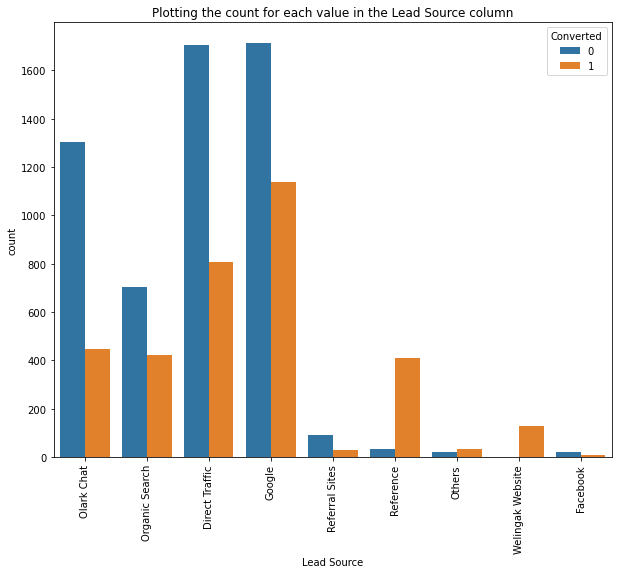

In [41]:
#Plot showing the distribution of the Lead Source value along with the Converted attribute
bivariatechart('Lead Source')

From the above chart we can infer that the converted count are high for Lead Source of Google and Direct Traffic.But when the customers are 'Reference' their chance of getting converted to leads are high compared to not getting converted.

In [42]:
Lead_Score['Last Activity'].value_counts(dropna=False)

Email Opened                    3415
SMS Sent                        2722
Olark Chat Conversation          970
Page Visited on Website          602
Converted to Lead                428
Email Bounced                    311
Email Link Clicked               266
Form Submitted on Website        115
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       5
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [43]:
# Replace the below values of the Last Activity with Others
Lead_Score['Last Activity']=Lead_Score['Last Activity'].replace([np.nan,'Approached upfront', 'View in browser link Clicked',
                     'Email Received',            'Email Marked Spam',
         'Visited Booth in Tradeshow',       'Resubscribed to emails'],'Others')

In [44]:
Lead_Score['Last Activity'].value_counts(dropna=False)

Email Opened                 3415
SMS Sent                     2722
Olark Chat Conversation       970
Page Visited on Website       602
Converted to Lead             428
Email Bounced                 311
Email Link Clicked            266
Form Submitted on Website     115
Unreachable                    90
Unsubscribed                   61
Had a Phone Conversation       24
Others                         16
Name: Last Activity, dtype: int64

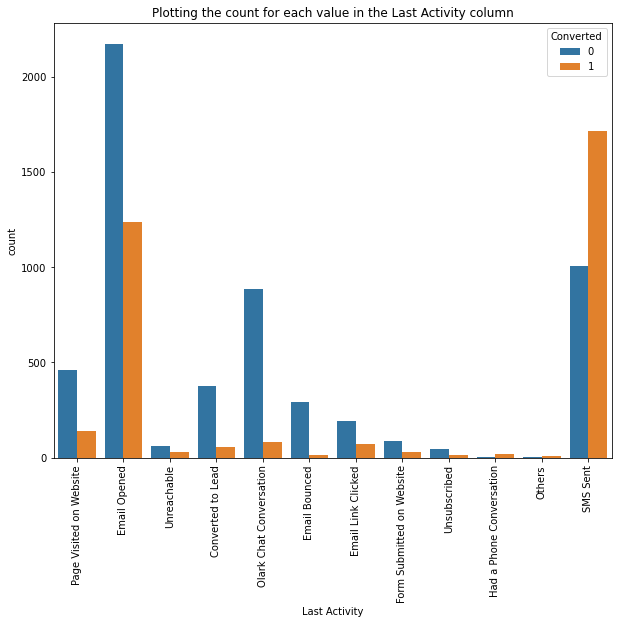

In [45]:
#Plot showing the distribution of the Lead Source value along with the Converted attribute
bivariatechart('Last Activity')

From the above chart we can infer that the chance of getting converted to potential leads is high when the customer sents SMS,When the Email is opened.

In [46]:
#checking value counts of Country column
Lead_Score['Country'].value_counts(dropna=False)

India                   6412
NaN                     2324
United States             68
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
Nigeria                    4
South Africa               4
Canada                     4
Kuwait                     4
unknown                    4
Germany                    4
Sweden                     3
Bangladesh                 2
Uganda                     2
Netherlands                2
Belgium                    2
Asia/Pacific Region        2
China                      2
Philippines                2
Ghana                      2
Italy                      2
Kenya                      1
Denmark                    1
Vietnam                    1
Sri Lanka                  1
Switzerland                1
Tanzania      

 Since India has the majority of the count.We replace the Nan values with India


In [47]:
#Impute the NaN value with India
Lead_Score.loc[Lead_Score["Country"].isnull(),'Country']=Lead_Score["Country"].apply(lambda x:"India")   

In [48]:
Lead_Score['Country'].value_counts(dropna=False)

India                   8736
United States             68
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
Kuwait                     4
unknown                    4
Germany                    4
South Africa               4
Canada                     4
Nigeria                    4
Sweden                     3
Philippines                2
Uganda                     2
Asia/Pacific Region        2
Belgium                    2
Bangladesh                 2
China                      2
Ghana                      2
Italy                      2
Netherlands                2
Kenya                      1
Denmark                    1
Vietnam                    1
Sri Lanka                  1
Switzerland                1
Tanzania                   1
Indonesia     

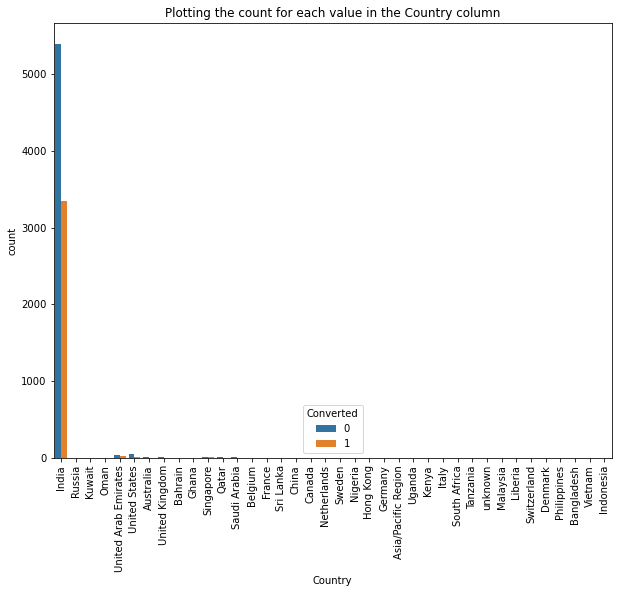

In [49]:
#Plot the chart for Country columnn after replacing NaN values
bivariatechart("Country")

From The chart we can see majority of the clients are from India

In [50]:
#Impute the NaN value with India
Lead_Score["Country"]=Lead_Score["Country"].apply(lambda x:"India" if x=='India' else 'Others')   

In [51]:
Lead_Score["Country"].value_counts()

India     8736
Others     284
Name: Country, dtype: int64

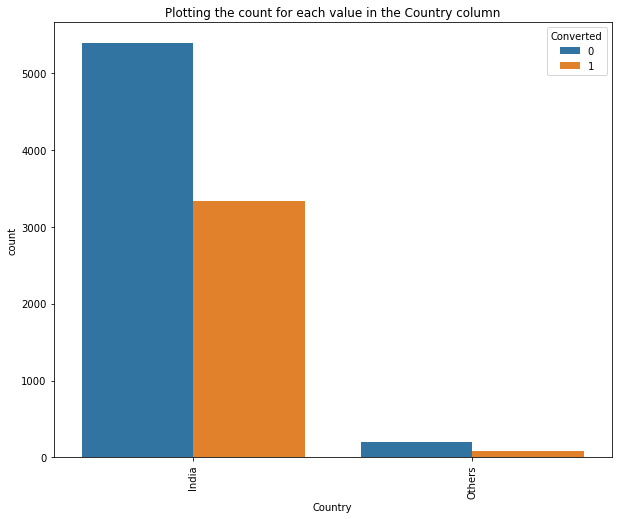

In [52]:
#Plot the chart for Country columnn after replacing NaN values
bivariatechart("Country")

In [53]:
#checking value counts of Country column
Lead_Score['City'].value_counts(dropna=False)

NaN                            3591
Mumbai                         3135
Thane & Outskirts               732
Other Cities                    671
Other Cities of Maharashtra     446
Other Metro Cities              372
Tier II Cities                   73
Name: City, dtype: int64

Majority of the counts are from Mumbai hence we impute the Nan values with Mumbai(highest count)

In [54]:
#Impute the NaN value with Mumbai
Lead_Score.loc[Lead_Score["City"].isnull(),'City']=Lead_Score["City"].apply(lambda x:"Mumbai")   

In [55]:
Lead_Score['City'].value_counts(dropna=False)

Mumbai                         6726
Thane & Outskirts               732
Other Cities                    671
Other Cities of Maharashtra     446
Other Metro Cities              372
Tier II Cities                   73
Name: City, dtype: int64

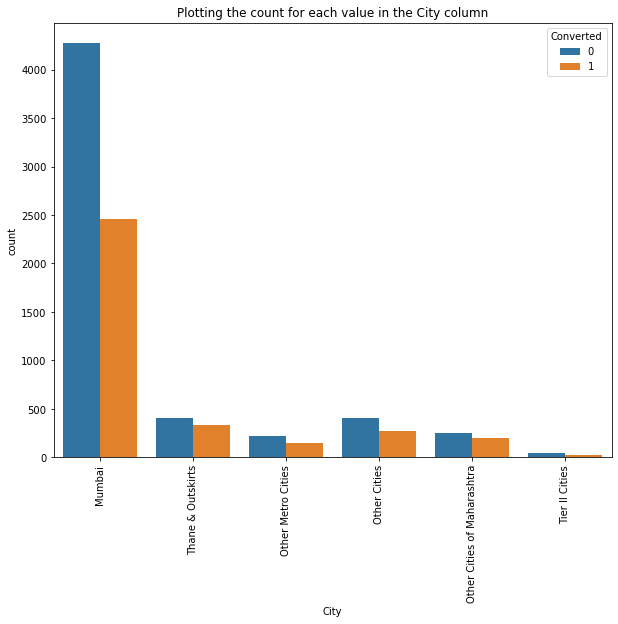

In [56]:
#Plot the chart for City columnn after replacing NaN values
bivariatechart("City")

From the above chart we can see majority of clients are from Mumbai followed by Thane & Outskirts,Other cities

In [57]:
#checking value counts of Specialization column
Lead_Score['Specialization'].value_counts(dropna=False)

NaN                                  3293
Finance Management                    954
Human Resource Management             826
Marketing Management                  819
Operations Management                 498
Business Administration               393
IT Projects Management                363
Supply Chain Management               343
Banking, Investment And Insurance     327
Media and Advertising                 199
Travel and Tourism                    197
International Business                174
Healthcare Management                 152
E-COMMERCE                            110
Hospitality Management                109
Retail Management                      97
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    40
Name: Specialization, dtype: int64

 Lead may not have mentioned specialization because it was not in the list or maybe they are a students  and don't have a specialization yet.

In [58]:
# Replace NaN values here with 'Others'

Lead_Score['Specialization'] = Lead_Score['Specialization'].replace(np.nan, 'Others')

In [59]:
Lead_Score['Specialization'].value_counts(dropna=False)

Others                               3293
Finance Management                    954
Human Resource Management             826
Marketing Management                  819
Operations Management                 498
Business Administration               393
IT Projects Management                363
Supply Chain Management               343
Banking, Investment And Insurance     327
Media and Advertising                 199
Travel and Tourism                    197
International Business                174
Healthcare Management                 152
E-COMMERCE                            110
Hospitality Management                109
Retail Management                      97
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    40
Name: Specialization, dtype: int64

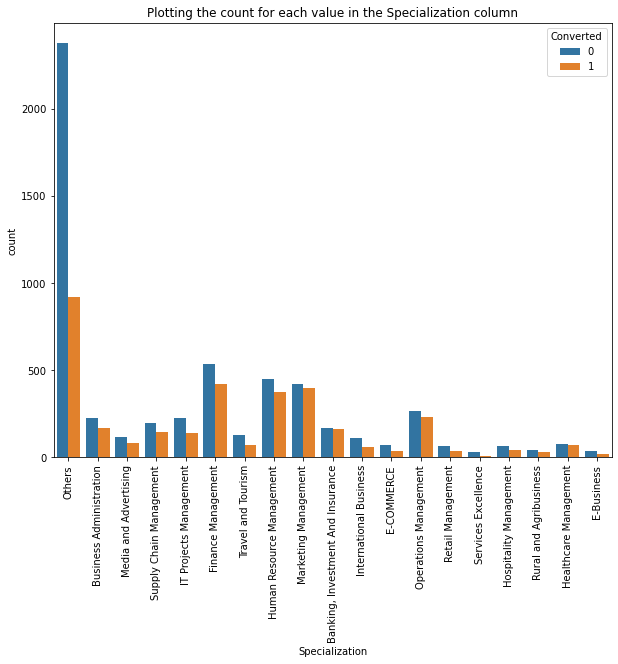

In [60]:
#Plot the chart for Specialization columnn after replacing NaN values
bivariatechart('Specialization')

Majority of the customers have not mentioned their specialization.The Finance management followed by Marketing Management and Human Resource management have the higher chance of converting to lead

In [61]:
#checking value counts of What is your current occupation column
Lead_Score['What is your current occupation'].value_counts(dropna=False)

Unemployed              5447
NaN                     2665
Working Professional     672
Student                  206
Other                     13
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

There are few values given as Nan we can replace those with the maximum category value of Unemployed.As there maybe a possibility they are unemployed and hence left it as blank

In [62]:
#Impute the Nan values in the What is your current occupation column with Unemployed
Lead_Score.loc[Lead_Score["What is your current occupation"].isnull(),'What is your current occupation']=Lead_Score["What is your current occupation"].apply(lambda x:"Unemployed")  
Lead_Score['What is your current occupation'].value_counts(dropna=False)

Unemployed              8112
Working Professional     672
Student                  206
Other                     13
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

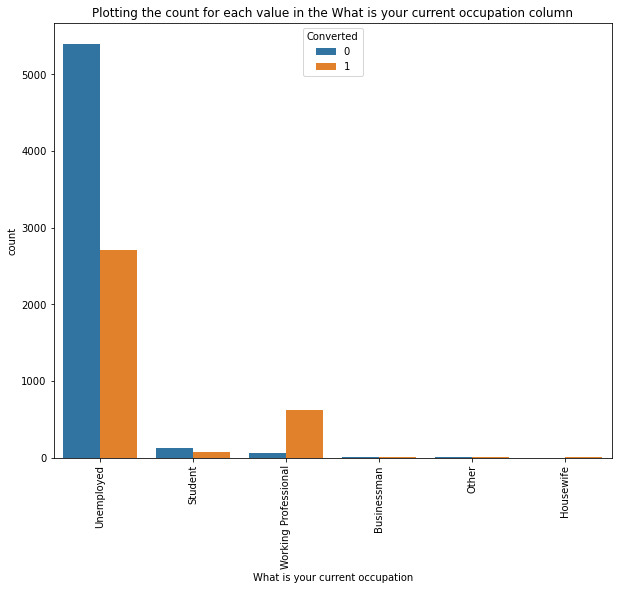

In [63]:
#Plot the chart for What is your current occupation columnn after replacing NaN values
bivariatechart('What is your current occupation')

- The Working Professional have the higher chance of converting to leads  and joining the course.
- The unemployed have the highest count of converted leads.

In [64]:
#checking value counts of What matters most to you in choosing a course column
Lead_Score['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6335
NaN                          2683
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [65]:
#Impute the Nan values in the What matters most to you in choosing a course with Better Career Prospects
Lead_Score.loc[Lead_Score["What matters most to you in choosing a course"].isnull(),'What matters most to you in choosing a course']=Lead_Score['What matters most to you in choosing a course'].apply(lambda x:"Better Career Prospects")  
Lead_Score['What matters most to you in choosing a course'].value_counts(dropna=False)


Better Career Prospects      9018
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

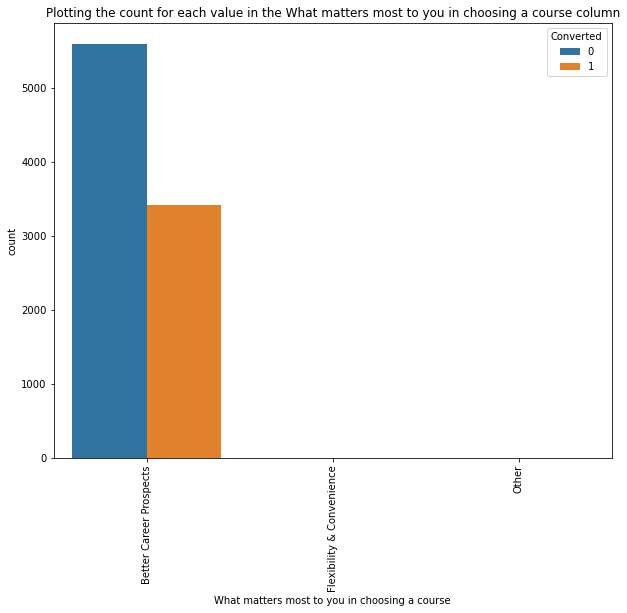

In [66]:

#Plot the chart for What matters most to you in choosing a course after replacing NaN values
bivariatechart('What matters most to you in choosing a course')

From the above chart it is clearly evident that majority of clients are joining the course for Better Career Prospects

In [67]:
#checking value counts of Tags column
Lead_Score['Tags'].value_counts(dropna=False)

NaN                                                  3308
Will revert after reading the email                  2017
Ringing                                              1173
Interested in other courses                           506
Already a student                                     464
Closed by Horizzon                                    292
switched off                                          239
Busy                                                  185
Lost to EINS                                          171
Not doing further education                           138
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

In [68]:
#replacing Nan values with "Not Specified"
Lead_Score['Tags'] = Lead_Score['Tags'].replace(np.nan,'Not Specified')

In [69]:
Lead_Score['Tags'].value_counts(dropna=False).index

Index(['Not Specified', 'Will revert after reading the email', 'Ringing',
       'Interested in other courses', 'Already a student',
       'Closed by Horizzon', 'switched off', 'Busy', 'Lost to EINS',
       'Not doing further education', 'Interested  in full time MBA',
       'Graduation in progress', 'invalid number',
       'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
       'number not provided', 'in touch with EINS', 'Lost to Others',
       'Still Thinking', 'Want to take admission but has financial problems',
       'In confusion whether part time or DLP', 'Interested in Next batch',
       'Lateral student', 'University not recognized',
       'Shall take in the next coming month',
       'Recognition issue (DEC approval)'],
      dtype='object')

In [70]:
# Replace the tags 'wrong number given', 'opp hangup','number not provided', 'in touch with EINS', 'Lost to Others',
   #    'Still Thinking', 'Want to take admission but has financial problems',
    #   'Interested in Next batch', 'In confusion whether part time or DLP',
    #   'Lateral student', 'University not recognized',
    #   'Shall take in the next coming month',
    #   'Recognition issue (DEC approval)' with others
Lead_Score['Tags'] = Lead_Score['Tags'].replace(['wrong number given', 'opp hangup',
       'number not provided', 'in touch with EINS', 'Lost to Others',
       'Still Thinking', 'Want to take admission but has financial problems',
       'Interested in Next batch', 'In confusion whether part time or DLP',
       'Lateral student', 'University not recognized',
       'Shall take in the next coming month',
       'Recognition issue (DEC approval)'],'Others')

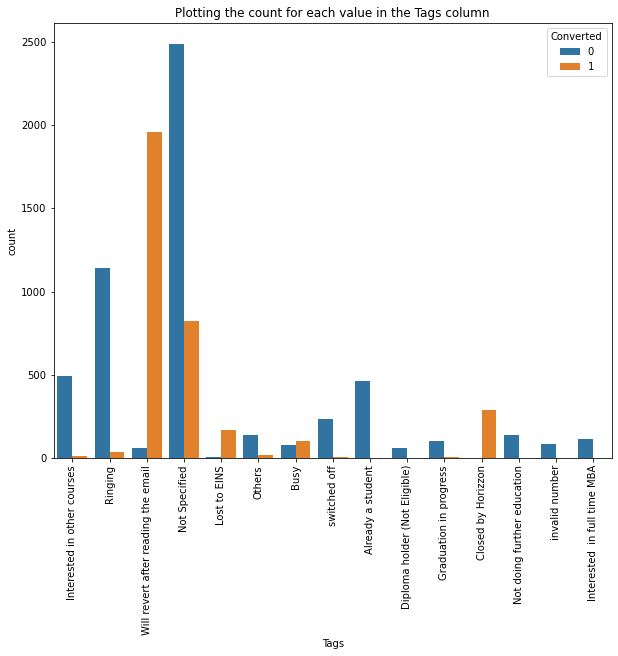

In [71]:

#Plot the chart for Tags columnn after replacing NaN values
bivariatechart('Tags')

From the chart above it is clearly evident that the category'Will Revert after reading the email' has the highest chance of getting converted to leads.Followed by Lost to EINS and Closed by Horizzon

In [72]:
#checking value counts 'Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score' columns

Lead_Score['Asymmetrique Activity Index'].value_counts(dropna=False,normalize=True)


NaN          0.458537
02.Medium    0.413415
01.High      0.088137
03.Low       0.039911
Name: Asymmetrique Activity Index, dtype: float64

In [73]:
Lead_Score['Asymmetrique Activity Score'].value_counts(dropna=False,normalize=True)

NaN     0.458537
14.0    0.188692
15.0    0.141574
13.0    0.083149
16.0    0.049889
17.0    0.037916
12.0    0.021729
11.0    0.010310
10.0    0.006319
9.0     0.000998
8.0     0.000443
18.0    0.000333
7.0     0.000111
Name: Asymmetrique Activity Score, dtype: float64

In [74]:
Lead_Score['Asymmetrique Profile Index'].value_counts(dropna=False,normalize=True)

NaN          0.458537
02.Medium    0.302328
01.High      0.235809
03.Low       0.003326
Name: Asymmetrique Profile Index, dtype: float64

In [75]:
Lead_Score['Asymmetrique Profile Score'].value_counts(dropna=False,normalize=True)

NaN     0.458537
15.0    0.191574
18.0    0.116630
16.0    0.065078
17.0    0.062306
20.0    0.032262
19.0    0.024612
14.0    0.023947
13.0    0.021729
12.0    0.002439
11.0    0.000887
Name: Asymmetrique Profile Score, dtype: float64

In [76]:
#Drop the Asymmetrique columns as they have missing value >45%
Lead_Score = Lead_Score.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1)

In [77]:
Lead_Score.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [78]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is 1.48% ,and will not affect the model
Lead_Score = Lead_Score.dropna()

A total of 137 records have been dropped which is insignificant compared to the total record count and willnot affect our model.

In [79]:
Lead_Score.shape

(9020, 30)

In [80]:
#Checking percentage of Null Values in All Columns:
round(100*(Lead_Score.isnull().sum()/len(Lead_Score.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

There are no null values/Missing values in data of all columns

## Step 3: Data Preparation

### Converting some binary variables (Yes/No) to 0/1

In [81]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Lead_Score[varlist] =Lead_Score[varlist].apply(binary_map)

In [82]:
Lead_Score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,Interested in other courses,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,Ringing,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


In [83]:
#getting a list of categorical columns

cat_cols= Lead_Score.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

### Creating Dummy Variables

In [84]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Lead_Score[['Lead Origin', 'Specialization', 'Tags', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
Lead_Score = pd.concat([Lead_Score, dummy1], axis=1)

In [85]:
Lead_Score['Last Activity'].value_counts()

Email Opened                 3415
SMS Sent                     2722
Olark Chat Conversation       970
Page Visited on Website       602
Converted to Lead             428
Email Bounced                 311
Email Link Clicked            266
Form Submitted on Website     115
Unreachable                    90
Unsubscribed                   61
Had a Phone Conversation       24
Others                         16
Name: Last Activity, dtype: int64

In [86]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable Lead Source
ls1 = pd.get_dummies(Lead_Score['Lead Source'], prefix='Lead Source')
# Dropping Lead Import column
ls1 = ls1.drop(['Lead Source_Others'], 1)
#Adding the results to the master dataframe
Lead_Score = pd.concat([Lead_Score,ls1], axis=1)

# Creating dummy variables for the variable Last Activity
la1 = pd.get_dummies(Lead_Score['Last Activity'], prefix='Last Activity')
# Dropping Lead Import column
la1 = la1.drop(['Last Activity_Others'], 1)
#Adding the results to the master dataframe
Lead_Score = pd.concat([Lead_Score,la1], axis=1)


# Creating dummy variables for the variable Country
c1 = pd.get_dummies(Lead_Score['Country'], prefix='Country')
# Dropping Lead Import column
c1 = c1.drop(['Country_Others'], 1)
#Adding the results to the master dataframe
Lead_Score = pd.concat([Lead_Score,c1], axis=1)

# Creating dummy variables for the variable What is your current occupation
co1 = pd.get_dummies(Lead_Score['What is your current occupation'], prefix='What is your current occupation')
# Dropping Lead Import column
co1 = co1.drop(['What is your current occupation_Other'], 1)
#Adding the results to the master dataframe
Lead_Score = pd.concat([Lead_Score,co1], axis=1)

# Creating dummy variables for the variable What matters most to you in choosing a course
cc1 = pd.get_dummies(Lead_Score['What matters most to you in choosing a course'], prefix='What matters most to you in choosing a course')
# Dropping Lead Import column
cc1 = cc1.drop(['What matters most to you in choosing a course_Other'], 1)
#Adding the results to the master dataframe
Lead_Score = pd.concat([Lead_Score,cc1], axis=1)

# Creating dummy variables for the variable City
city1 = pd.get_dummies(Lead_Score['City'], prefix='City')
# Dropping Lead Import column
city1 = city1.drop(['City_Tier II Cities'], 1)
#Adding the results to the master dataframe
Lead_Score = pd.concat([Lead_Score,city1], axis=1)



In [87]:
#dropping the original columns after dummy variable creation

Lead_Score.drop(cat_cols,1,inplace = True)

In [88]:
Lead_Score.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,1,0,1,0,1,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [89]:
# Checking percentage of missing values after removing the missing values
round(100*(Lead_Score.isnull().sum()/len(Lead_Score.index)), 2)

Lead Number                         0.0
Do Not Email                        0.0
Do Not Call                         0.0
Converted                           0.0
TotalVisits                         0.0
                                   ... 
City_Mumbai                         0.0
City_Other Cities                   0.0
City_Other Cities of Maharashtra    0.0
City_Other Metro Cities             0.0
City_Thane & Outskirts              0.0
Length: 101, dtype: float64

## Step 4: Train-Test Split

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
Lead_Score.head()


,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,1,0,1,0,1,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [92]:
# Putting feature variable to X
X = Lead_Score.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [93]:
# Putting response variable to y
y = Lead_Score['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [94]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
2873,0,0,0.271781,0.031598,0.814423,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
6823,0,0,1.276480,2.389158,2.274024,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
7258,0,0,-1.067817,-0.874028,-1.131710,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
8327,0,0,1.611379,1.982176,0.167334,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
5940,1,0,-0.732918,-0.701703,-0.645177,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [97]:
### Checking the Converted Rate
converted = (sum(Lead_Score['Converted'])/len(Lead_Score['Converted'].index))*100
converted

37.971175166297115

We have almost 38% Converted rate

## Step 6: Model Building


### Running Your First Training Model

In [98]:
import statsmodels.api as sm

In [99]:
# Logistic regression model
logmodel1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmodel1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6223
Model Family:                Binomial   Df Model:                           90
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 Oct 2021   Deviance:                          nan
Time:                        21:05:56   Pearson chi2:                 3.74e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -3.468e+15   7.19e+07  -4.82e+07      0.000   -3.47e+15   -3.47e+15
Do Not Email                                                            -3.987e+14   4.53e+06   -8.8e+07      0.000   -3.99e+14   -3.99e+14
Do Not Call                                                              3.471e+15   4.78e+07   7.27e+07      0.000    3.47e+15    3.47e+15
TotalVisits                                                              1.299e+14   1.39e+06   9.36e+07      0.000     1.3e+14     1.3e+14
Total Time Spent on Website                                              4.303e+14   1.04e+06   4.14e+08      0.000     4.3e+14     4.3e+14
Page Views Per Visit                                                    -9.515e+13   1.45e+06  -6.56e+07      0.000   -9.52e+13   -9.52e+13
Search                                                                   6.308e+14   2.17e+07   2.91e+07      0.000    6.31e+14    6.31e+14
Magazine                                                                  -21.1072   2.42e-07  -8.71e+07      0.000     -21.107     -21.107
Newspaper Article                                                        4.398e+15   6.74e+07   6.52e+07      0.000     4.4e+15     4.4e+15
X Education Forums                                                         79.4161   9.26e-07   8.57e+07      0.000      79.416      79.416
Newspaper                                                               -4.188e+15   6.74e+07  -6.22e+07      0.000   -4.19e+15   -4.19e+15
Digital Advertisement                                                   -6.898e+12   4.77e+07  -1.45e+05      0.000    -6.9e+12    -6.9e+12
Through Recommendations                                                  9.373e+14   3.44e+07   2.73e+07      0.000    9.37e+14    9.37e+14
Receive More Updates About Our Courses                                     27.8685   3.24e-07   8.61e+07      0.000      27.869      27.869
Update me on Supply Chain Content                                          -9.9862   5.88e-07   -1.7e+07      0.000      -9.986      -9.986
Get updates on DM Content                                                 -15.8662   3.41e-07  -4.66e+07      0.000     -15.866     -15.866
I agree to pay the amount through cheque                                   28.3965   3.42e-07    8.3e+07      0.000      28.396      28.396
A free copy of Mastering The Interview                                   8.413e+12   2.76e+06   3.05e+06      0.000    8.41e+12    8.41e+12
Lead Origin_Landing Page Submission                                     -2.241e+14   3.43e+06  -6.54e+07      0.000   -2.24e+14   -2.24e+14
Lea

### Step 7.1: Feature Selection Using RFE

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [101]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [102]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [103]:
list(zip(X_train.
         columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('Do Not Call', False, 59),
 ('TotalVisits', False, 40),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 41),
 ('Search', False, 20),
 ('Magazine', False, 79),
 ('Newspaper Article', False, 61),
 ('X Education Forums', False, 80),
 ('Newspaper', False, 56),
 ('Digital Advertisement', False, 76),
 ('Through Recommendations', False, 63),
 ('Receive More Updates About Our Courses', False, 81),
 ('Update me on Supply Chain Content', False, 82),
 ('Get updates on DM Content', False, 84),
 ('I agree to pay the amount through cheque', False, 85),
 ('A free copy of Mastering The Interview', False, 47),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Specialization_Business Administration', False, 65),
 ('Specialization_E-Business', False, 49),
 ('Specialization_E-COMMERCE', False, 43),
 ('Specialization_Finance Management', False, 35),
 ('Specializ

In [104]:
col=X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Specialization_Hospitality Management', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off',
       'Last Notable Activity_Modified', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent'],
      dtype='object')

In [105]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',

### Assessing the model using statsmodel

### Model 1:Build the model using all the variables from the RFE

In [106]:
# Creating X_test dataframe with RFE selected variables and adding a constant
#Building the logistic Regression model and fitting it
X_train_sm=sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1229.2
Date:                Mon, 11 Oct 2021   Deviance:                       2458.5
Time:                        21:06:14   Pearson chi2:                 1.04e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6094      0.203    -17.744      0.000      -4.008      -3.211
Total Time Spent on Website                  1.0861      0.061     17.708      0.000       0.966       1.206
Lead Origin_Lead Add Form                    2.0453      0.427      4.793      0.000       1.209       2.882
Specialization_Hospitality Management       -1.1623      0.472     -2.461      0.014      -2.088      -0.237
Tags_Busy                                    2.7639      0.303      9.107      0.000       2.169       3.359
Tags_Closed by Horizzon                      9.3071      1.037      8.973      0.000       7.274      11.340
Tags_Lost to EINS                            7.8423      0.635     12.343      0.000       6.597       9.087
Tags_Not Specified                           1.8342      0.201      9.130      0.000       1.440       2.228
Tags_Ringing                                -1.5851      0.300     -5.276      0.000      -2.174      -0.996
Tags_Will revert after reading the email     6.5011      0.263     24.714      0.000       5.986       7.017
Tags_invalid number                         -1.5490      1.061     -1.460      0.144      -3.628       0.530
Tags_switched off                           -2.1648      0.641     -3.375      0.001      -3.422      -0.908
Last Notable Activity_Modified              -1.7418      0.127    -13.700      0.000      -1.991      -1.493
Lead Source_Olark Chat                       1.2270      0.147      8.343      0.000       0.939       1.515
Lead Source_Welingak Website                 3.5533      0.847      4.195      0.000       1.893       5.213
Last Activity_SMS Sent                       2.1500      0.118     18.150      0.000       1.918       2.382
============================================================================================================
"""

In [107]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
#Get the VIF for the model 1
vif=pd.DataFrame()
X=X_train_sm
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif =vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,7.91
9,Tags_Will revert after reading the email,2.30
7,Tags_Not Specified,2.09
2,Lead Origin_Lead Add Form,1.71
8,Tags_Ringing,1.65
1,Total Time Spent on Website,1.47
14,Lead Source_Welingak Website,1.33
5,Tags_Closed by Horizzon,1.31
13,Lead Source_Olark Chat,1.31
15,Last Activity_SMS Sent,1.18


In [109]:
#drop the Tags_invalid number columns
X_train_1=X_train_sm.drop(['Tags_invalid number'],axis=1)

#### Model 2:Build a model using all the variables after dropping Tags_invalid number

In [110]:
#Building the logistic Regression model and fitting it
X_train_2=sm.add_constant(X_train_1)
logm2 = sm.GLM(y_train,X_train_2, family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1230.8
Date:                Mon, 11 Oct 2021   Deviance:                       2461.7
Time:                        21:06:14   Pearson chi2:                 1.04e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7035      0.200    -18.518      0.000      -4.095      -3.312
Total Time Spent on Website                  1.0915      0.061     17.813      0.000       0.971       1.212
Lead Origin_Lead Add Form                    2.0689      0.428      4.831      0.000       1.230       2.908
Specialization_Hospitality Management       -1.1562      0.472     -2.448      0.014      -2.082      -0.230
Tags_Busy                                    2.8618      0.300      9.528      0.000       2.273       3.451
Tags_Closed by Horizzon                      9.3865      1.037      9.052      0.000       7.354      11.419
Tags_Lost to EINS                            7.9267      0.635     12.485      0.000       6.682       9.171
Tags_Not Specified                           1.9285      0.197      9.782      0.000       1.542       2.315
Tags_Ringing                                -1.4851      0.297     -5.001      0.000      -2.067      -0.903
Tags_Will revert after reading the email     6.5898      0.261     25.239      0.000       6.078       7.102
Tags_switched off                           -2.0642      0.640     -3.226      0.001      -3.318      -0.810
Last Notable Activity_Modified              -1.7319      0.127    -13.630      0.000      -1.981      -1.483
Lead Source_Olark Chat                       1.2341      0.147      8.397      0.000       0.946       1.522
Lead Source_Welingak Website                 3.5351      0.848      4.171      0.000       1.874       5.196
Last Activity_SMS Sent                       2.1354      0.118     18.109      0.000       1.904       2.367
============================================================================================================
"""

In [111]:
#Get the VIF for the model 2
vif=pd.DataFrame()
X=X_train_2
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif =vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,7.52
9,Tags_Will revert after reading the email,2.23
7,Tags_Not Specified,2.01
2,Lead Origin_Lead Add Form,1.71
8,Tags_Ringing,1.61
1,Total Time Spent on Website,1.47
13,Lead Source_Welingak Website,1.33
12,Lead Source_Olark Chat,1.31
5,Tags_Closed by Horizzon,1.30
14,Last Activity_SMS Sent,1.17


In [112]:
# Drop the const
X_train_2_const=X_train_2.drop(['const'],axis=1)

In [113]:
#Get the VIF for the model 2 after dropping const 
vif=pd.DataFrame()
X=X_train_2_const
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif =vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.84
8,Tags_Will revert after reading the email,1.67
13,Last Activity_SMS Sent,1.65
6,Tags_Not Specified,1.63
11,Lead Source_Olark Chat,1.58
0,Total Time Spent on Website,1.47
10,Last Notable Activity_Modified,1.41
12,Lead Source_Welingak Website,1.35
4,Tags_Closed by Horizzon,1.22
7,Tags_Ringing,1.13


### All the p values of the predictor variables are <0.05 (predictors seems to be significant) and the corresponding VIF values(VERY LOW Multicollinearity between the predictors) are also less( < 5) after dropping the constant.
### Hence we proceed with the model 2 for further analysis.

In [114]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_2)

In [115]:
y_train_pred = y_train_pred.values.reshape(-1)

In [116]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,ID
0,1,0.996723,2873
1,1,0.999514,6823
2,0,0.038168,7258
3,1,0.993631,8327
4,0,0.013750,5940


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [117]:
y_train_pred_final['predicted']=y_train_pred_final.Converted_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted
0,1,0.996723,2873,1
1,1,0.999514,6823,1
2,0,0.038168,7258,0
3,1,0.993631,8327,1
4,0,0.013750,5940,0


In [118]:
from sklearn import metrics

In [119]:
# Getting the overall accuracy of the model
acc=metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['predicted'])
acc

0.9293633196072221

In [120]:
#Getting the confusion matrix for model2 
confusion=metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['predicted'])
confusion

array([[3782,  155],
       [ 291, 2086]], dtype=int64)

In [121]:
# Actual/Predicted        not_converted    converted
        # not_converted        3782      155
        # converted            291       2086  

### Metrics beyond simply accuracy

In [122]:
#True Negatives
TN=confusion[0,0]
#False Positive
FP=confusion[0,1]
#False Negative
FN=confusion[1,0]
#True Positive
TP=confusion[1,1]

In [123]:
# Finding the sensitivity of the model
sens=TP/float(TP+FN)
sens

0.877576777450568

In [124]:
# Finding the specificity of the model
spec=TN/float(TN+FP)
spec

0.9606299212598425

In [125]:
# Finding the precision of the model
prec=TP/float(TP+FP)
prec

0.930834448906738

In [126]:
# Finding the recall of the model
recall=TP/float(TP+FN)
recall

0.877576777450568

## Plotting the ROC curve

In [127]:
#Code snippet for plotting the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [128]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

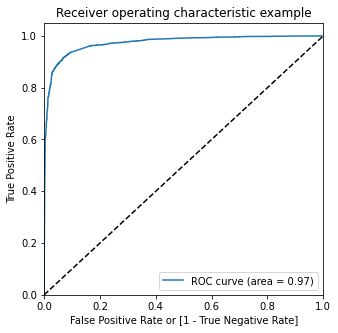

In [129]:
#Plotting the ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [130]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.996723,2873,1,1,1,1,1,1,1,1,1,1,1
1,1,0.999514,6823,1,1,1,1,1,1,1,1,1,1,1
2,0,0.038168,7258,0,1,0,0,0,0,0,0,0,0,0
3,1,0.993631,8327,1,1,1,1,1,1,1,1,1,1,1
4,0,0.013750,5940,0,1,0,0,0,0,0,0,0,0,0


In [131]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376465  1.000000  0.000000
0.1   0.1  0.836079  0.972234  0.753874
0.2   0.2  0.918277  0.936054  0.907544
0.3   0.3  0.924929  0.917122  0.929642
0.4   0.4  0.927304  0.898612  0.944628
0.5   0.5  0.929363  0.877577  0.960630
0.6   0.6  0.928096  0.855700  0.971806
0.7   0.7  0.913050  0.803955  0.978918
0.8   0.8  0.905607  0.777451  0.982982
0.9   0.9  0.886126  0.716870  0.988316


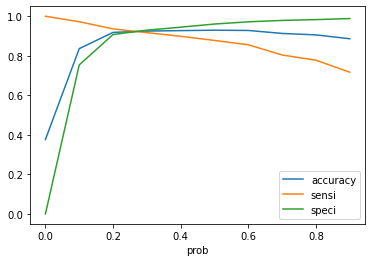

In [132]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the graph and values of the above  plot accuracy sensitivity and specificity for various probabilities we can conclude that the optimal cut off value is 0.3

In [133]:
### Creating a new column predicted with the new cut off of 0.3
y_train_pred_final['predicted']=y_train_pred_final.Converted_prob.map(lambda x:1 if x>0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.996723,2873,1,1,1,1,1,1,1,1,1,1,1
1,1,0.999514,6823,1,1,1,1,1,1,1,1,1,1,1
2,0,0.038168,7258,0,1,0,0,0,0,0,0,0,0,0
3,1,0.993631,8327,1,1,1,1,1,1,1,1,1,1,1
4,0,0.013750,5940,0,1,0,0,0,0,0,0,0,0,0


In [134]:
y_train_pred_final["Lead_Score"]=y_train_pred_final["Converted_prob"].apply(lambda x:round(x*100))

In [135]:
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead_Score
0,1,0.996723,2873,1,1,1,1,1,1,1,1,1,1,1,100
1,1,0.999514,6823,1,1,1,1,1,1,1,1,1,1,1,100
2,0,0.038168,7258,0,1,0,0,0,0,0,0,0,0,0,4
3,1,0.993631,8327,1,1,1,1,1,1,1,1,1,1,1,99
4,0,0.013750,5940,0,1,0,0,0,0,0,0,0,0,0,1


In [136]:
# Finding the overall accuracy for new cut off of 0.3
acc=metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['predicted'])
acc

0.9249287298067785

In [137]:

#Finding the confusion matric for the new cut off of 0.3
confusion2=metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['predicted'])
confusion2

array([[3660,  277],
       [ 197, 2180]], dtype=int64)

In [138]:
# Actual/Predicted        not_converted    converted
        # not_converted        3660      277
        # converted            197       2180  

### Calculating metrics other than Accuracy

In [139]:
#True Negatives
TN=confusion2[0,0]
#False Positive
FP=confusion2[0,1]
#False Negative
FN=confusion2[1,0]
#True Positive
TP=confusion2[1,1]

In [140]:
# Finding the sensitivity of the model
sens=TP/float(TP+FN)
sens

0.9171224232225494

In [141]:
# Finding the specificity of the model
spec=TN/float(TN+FP)
spec

0.9296418592837186

In [142]:
# Finding the precision of the model
prec=TP/float(TP+FP)
prec

0.8872608872608873

In [143]:
# Finding the recall of the model
recall=TP/float(TP+FN)
recall

0.9171224232225494

In [144]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.07035814071628144


In [145]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8872608872608873


In [146]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9489240342234898


### Observations:




In [147]:
from sklearn.metrics import precision_score,recall_score


In [148]:
# Finding the precision value
print(precision_score(y_train_pred_final['Converted'],y_train_pred_final['predicted']))

0.8872608872608873


In [149]:
# Finding the recall value
print(recall_score(y_train_pred_final['Converted'],y_train_pred_final['predicted']))

0.9171224232225494


In [150]:
from sklearn.metrics import precision_recall_curve

In [151]:
precision, recall,thresholds = precision_recall_curve(
   y_train_pred_final['Converted'],y_train_pred_final['Converted_prob'])

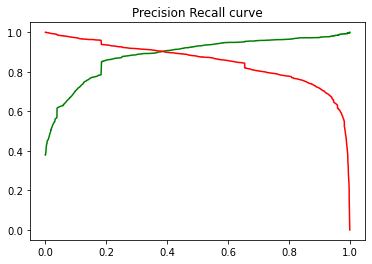

In [152]:
# Plot the precision and recall values
plt.plot(thresholds,precision[:-1],'g-')
plt.plot(thresholds,recall[:-1],'r-')
plt.title("Precision Recall curve")
plt.show()

### Making Predictions

#### Applying the scaling on the test sets

In [153]:
X_test

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
5130,1,0,0.0,0,0.00,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
6929,0,0,5.0,29,5.00,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1484,1,0,4.0,125,4.00,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
6519,0,0,2.0,1581,2.00,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
7472,0,0,2.0,1386,2.00,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,0,0,3.0,759,3.00,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1962,0,0,5.0,169,2.50,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
3882,0,0,7.0,255,2.33,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
8451,0,0,8.0,1607,2.67,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [154]:
#Apply the scaler() to the variables TotalVisits,Total Time Spent on Website,Page Views Per Visit
num_vars=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
X_test[num_vars]=scaler.transform(X_test[num_vars])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
5130,1,0,-1.067817,-0.874028,-1.131710,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
6929,0,0,0.606681,-0.820864,1.300957,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1484,1,0,0.271781,-0.644872,0.814423,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
6519,0,0,-0.398018,2.024341,-0.158643,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
7472,0,0,-0.398018,1.666857,-0.158643,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [155]:
X_train_2_const.columns

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Specialization_Hospitality Management', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent'],
      dtype='object')

In [156]:
# Proceed with the predictions
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new=X_test[X_train_2_const.columns]
X_test_new.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Specialization_Hospitality Management,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent
5130,-0.874028,0,0,0,0,0,1,0,0,0,1,1,0,0
6929,-0.820864,0,0,0,0,0,1,0,0,0,0,0,0,0
1484,-0.644872,0,0,0,0,0,0,1,0,0,1,0,0,1
6519,2.024341,0,0,0,0,0,0,1,0,0,0,0,0,1
7472,1.666857,0,0,0,0,0,0,0,1,0,0,0,0,1


In [157]:
#Adding a constant
X_test_new=sm.add_constant(X_test_new)

In [158]:
#Making prediction using model2 res
y_pred=res.predict(X_test_new)
y_pred

5130    0.038168
6929    0.064705
1484    0.004115
6519    0.300782
7472    0.998932
          ...   
1814    0.007610
1962    0.002522
3882    0.002002
8451    0.708916
1362    0.053396
Length: 2706, dtype: float64

In [159]:
# Converting y_pred to a dataframe which is an array
y_pred_new=pd.DataFrame(y_pred)

In [160]:
# Converting y_test to a dataframe which is an array
y_test_1=pd.DataFrame(y_test)

In [161]:
y_pred_new["ID"]=y_pred_new.index
y_pred_new.head()

,0,ID
5130,0.038168,5130
6929,0.064705,6929
1484,0.004115,1484
6519,0.300782,6519
7472,0.998932,7472


In [162]:
y_test_1["ID"]=y_test_1.index
y_test_1.head()

,Converted,ID
5130,0,5130
6929,0,6929
1484,0,1484
6519,0,6519
7472,1,7472


In [163]:
y_pred_final=pd.merge(y_pred_new,y_test_1,on='ID',how='inner')

In [164]:
y_pred_final.head()

,0,ID,Converted
0,0.038168,5130,0
1,0.064705,6929,0
2,0.004115,1484,0
3,0.300782,6519,0
4,0.998932,7472,1


In [165]:
y_pred_final=y_pred_final.rename(columns={0:'Converted_prob'})
y_pred_final.head()

,Converted_prob,ID,Converted
0,0.038168,5130,0
1,0.064705,6929,0
2,0.004115,1484,0
3,0.300782,6519,0
4,0.998932,7472,1


In [166]:
y_pred_final["Lead_Score"]=y_pred_final["Converted_prob"].apply(lambda x:round(x*100))

In [167]:
### Creating a new column predicted with the new cut off of 0.3
y_pred_final['predicted']=y_pred_final.Converted_prob.map(lambda x:1 if x>0.3 else 0)
y_pred_final.head()

,Converted_prob,ID,Converted,Lead_Score,predicted
0,0.038168,5130,0,4,0
1,0.064705,6929,0,6,0
2,0.004115,1484,0,0,0
3,0.300782,6519,0,30,1
4,0.998932,7472,1,100,1


In [168]:
# Finding the overall accuracy of the test set
acc_test=metrics.accuracy_score(y_pred_final.Converted,y_pred_final.predicted)
acc_test

0.9194382852919438

In [169]:
# Finding the overall accuracy of the test set
confusion_test=metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.predicted)
confusion_test

array([[1524,  134],
       [  84,  964]], dtype=int64)

In [170]:
#True Negatives
TN=confusion_test[0,0]
#False Positive
FP=confusion_test[0,1]
#False Negative
FN=confusion_test[1,0]
#True Positive
TP=confusion_test[1,1]

In [171]:


# Finding the sensitivity of the model on test set
sens=TP/float(TP+FN)
sens

0.9198473282442748

In [172]:

# Finding the specificity of the model on test set
spec=TN/float(TN+FP)
spec

0.9191797346200241

In [173]:
# Finding the precision of the model on test set
prec=TP/float(TP+FP)
prec


0.8779599271402551

In [174]:

# Finding the recall of the model on test set
recall=TP/float(TP+FN)
recall

0.9198473282442748

In [175]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.08082026537997587


In [176]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8779599271402551


In [177]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9477611940298507


 ### Observations:
    

## Final Observation:
Let us compare the values obtained for Train & Test:

#### Train Data:
- Accuracy :    92.49%
- Sensitivity : 91.71%
- Specificity : 92.96%
#### Test Data: 
- Accuracy :    91.94%
- Sensitivity : 91.98%
- Specificity : 91.91%


The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

#### Recommendations:

After completeing the Model building the following are my recommendations :

From the coeff values of the model it is clearly evident that the following variables should be focussed the most inorder to increase the probability of lead conversion
- a)	Tags_Closed by Horizzon 
- b)	Tags_Lost to EINS
- c)	Tags_Will revert after reading the email

And the 3 variables that influence the lead conversion are-Tags,Lead Source ,Last Activity .
Then followed by Lead Origin,Last Notable Activity,Specialization and Total Time Spent on Website

Apart from this from the EDA we conclude that :

- The customer who have wished to not receive any emails tend to be not converted.So its better to target only people who opt to receive emails from the organization
-The customer had seen the ad in any of the listed items:'Search', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement' are very low.
- The converted count are high for Lead Source of Google and Direct Traffic.Hence it is suggested the company promotes their ads on the Google page .
-  The Landing Page Submission has the high conversion value. So when the people have submitted the forms their chance of converting is high .Hence we can target those clients through calls ,emails and sms.
- Also when the customer sents us sms or when they  have the email is opened their chance of turning to lead is high.
- The unemployed,Working professionals,student have higher chance of converting to leads .Hence we have to target these category of clients.
